In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


white_path = "wine-white.csv"
red_path = "wine-red.csv"

red_wine = pd.read_csv(red_path)
white_wine = pd.read_csv(white_path)

white_wine['label'] = 'default'
red_wine['label'] = 'default'


In [30]:
def labelWine(threshhold, wine_type, data): # function labels the white as being good or bad based on the threshhold value provided
    for index, row in data.iterrows():
        number = -1
        if wine_type == "red":
            number = 0
        
        elif wine_type == "white":
            number = 2
        
        quality = row['quality']
        if quality<threshhold: 
            data.at[index,'label'] = number
        else:
            data.at[index,'label'] = number+1
            
    return data


red_wine = labelWine(6, "red", red_wine)  #labeling the wine as being good or bad for both white and red whites
white_wine = labelWine(6, "white",white_wine)     

wine = pd.concat([red_wine,white_wine], ignore_index=True) #combining the red and white wine dataset after labeling 


    
wine = wine.drop(['quality'], axis=1)
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,3
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,2
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,3
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,3


# Clustering the dataset into 4 clusters
- The goal is to have the data group itself into good white wine, good red white wine, bad white wine and bad red wine
- good and bad wine will be determined by its quality rating

## Aglomerative Clustering

In [33]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.preprocessing import scale, MinMaxScaler, Normalizer, RobustScaler

# split the labels and features
labels = wine['label']
features = wine.drop(['label'], axis = 1)
print(features.shape)

def scale_fit(scaler, features, labels):
    
    sc_features = features.copy()
    scaler.fit(sc_features)
    sc_features = scaler.transform(sc_features)
    scores = aggclust_initial(sc_features, labels, 4)
    return scores

def aggclust_initial(features, labels, n_clust):
    scores = {name: [] for name in ('ward', 'complete', 'average', 'single', 'ward euclidean',
                                    'complete euclidean', 'average euclidean', 'single euclidean',
                                    'complete l1', 'average l1', 'single l1',
                                    'complete l2', 'average l2', 'single l2')}
    for linkage_mode in ('ward', 'complete', 'average', 'single'):
        for affinity in ('euclidean', 'l1', 'l2'):
            if linkage_mode == 'ward' and affinity != 'euclidean':
                print('skip l1 and l2 for ward')
            else:
                clust = AgglomerativeClustering(n_clusters = n_clust, affinity = affinity, 
                                                linkage = linkage_mode).fit(features)
                ARI_score = metrics.adjusted_rand_score(labels, clust.labels_)
                scores[linkage_mode + ' ' + affinity].append(ARI_score)
                scores[linkage_mode].append(ARI_score)
                print(f'AHC Affinity={affinity:9} Linkage mode={linkage_mode:8} ARI score = {ARI_score:.5}')
                print('\n')
    return scores
# intitial results no scaling                
scores = aggclust_initial(features, labels, 4)

# scale the data

sc_features = scale(features, axis = 1)
print("\n \tNow Scaled")
# results with scaling
sc_scores = aggclust_initial(sc_features, labels, 4)

# scale with different methods.
mm_scaler = MinMaxScaler()
n_scaler = Normalizer()
r_scaler = RobustScaler()


mm_scores = scale_fit(mm_scaler, features, labels)
n_scores = scale_fit(n_scaler, features, labels)
r_scores = scale_fit(r_scaler, features, labels)


(6497, 11)
AHC Affinity=euclidean Linkage mode=ward     ARI score = 0.16255


skip l1 and l2 for ward
skip l1 and l2 for ward
AHC Affinity=euclidean Linkage mode=complete ARI score = 0.24452


AHC Affinity=l1        Linkage mode=complete ARI score = -0.013737


AHC Affinity=l2        Linkage mode=complete ARI score = 0.24452


AHC Affinity=euclidean Linkage mode=average  ARI score = 0.30738


AHC Affinity=l1        Linkage mode=average  ARI score = 0.00052832


AHC Affinity=l2        Linkage mode=average  ARI score = 0.30738


AHC Affinity=euclidean Linkage mode=single   ARI score = 0.0001167


AHC Affinity=l1        Linkage mode=single   ARI score = 0.0001167


AHC Affinity=l2        Linkage mode=single   ARI score = 0.0001167



 	Now Scaled
AHC Affinity=euclidean Linkage mode=ward     ARI score = 0.17357


skip l1 and l2 for ward
skip l1 and l2 for ward
AHC Affinity=euclidean Linkage mode=complete ARI score = 0.11276


AHC Affinity=l1        Linkage mode=complete ARI score = 0.22895

### Results
- We don't have to visualize the results to see that all the scaled results using the three scalers did not give us different results when compared to the orginal features. The .scale() method did however give us some different results.
- Some of the scaled features provided better clustering results but the best results were on the non-scaled data using the 'average' linkage mode and 'euclidean' or 'l2'. 
- With the scaled data the best results were with 'complete' linkage and 'l1' affinity. 

The results can be found in the boxplot below

In [21]:
for k,v in scores.items():
    print(k, v)

ward [0.16255084342472914]
complete [0.24452349182144464, -0.013737148766553683, 0.24452349182144464]
average [0.30737634461812696, 0.0005283195865163993, 0.30737634461812696]
single [0.00011669883762438619, 0.00011669883762438619, 0.00011669883762438619]
ward euclidean [0.16255084342472914]
complete euclidean [0.24452349182144464]
average euclidean [0.30737634461812696]
single euclidean [0.00011669883762438619]
complete l1 [-0.013737148766553683]
average l1 [0.0005283195865163993]
single l1 [0.00011669883762438619]
complete l2 [0.24452349182144464]
average l2 [0.30737634461812696]
single l2 [0.00011669883762438619]


### Create a Dendogram

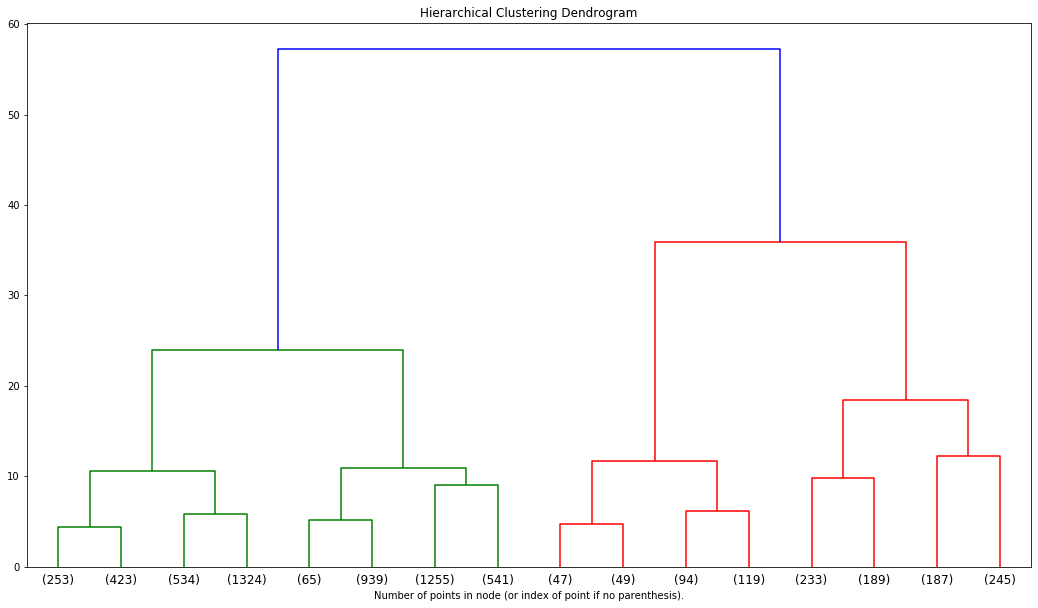

In [21]:
from scipy.cluster.hierarchy import dendrogram
# code taken from 
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(sc_features)
f, ax = plt.subplots(1, 1, figsize = (18,10))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")

plt.show()

This dendogram shows us the arrangement of the clusters. We can see that the greatest difference would occur if we tried to group the wines into two clusters. This makes sense as we did initially have two separate groups of wine, red and white. Our goal was to see if the wines can be separated into 4 clusters. Good Red, Bad Red, Good White and Bad White. The dendogram shows us that our features do not provide us with 4 well defined groups. A group of three or two would provide us with clusters with greater distance between the groups. 

### Create visualizations based on the scores and sc_scores arrays

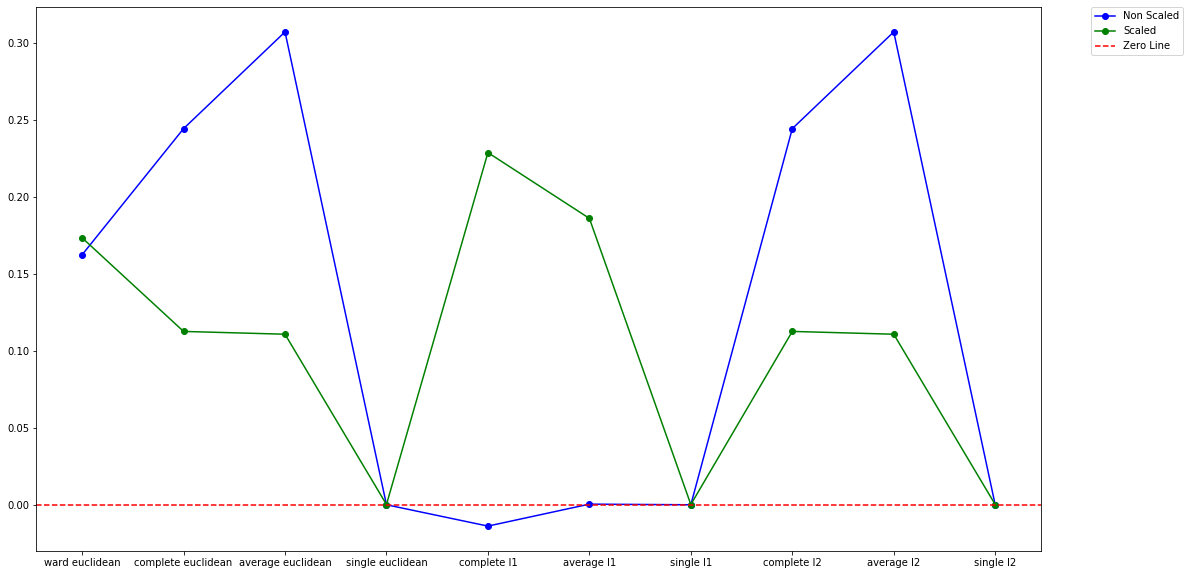

In [28]:
names = ['ward euclidean', 'complete euclidean', 'average euclidean', 'single euclidean',
        'complete l1', 'average l1', 'single l1', 'complete l2', 'average l2', 'single l2']

values = []
sc_values = []
for name in names:
    values.append(scores[name][0])
    sc_values.append(sc_scores[name][0])
    
f, ax = plt.subplots(1, 1, figsize = (18,10))
plt.plot(names, values, 'b', marker='o', label = 'Non Scaled')
plt.plot(names, sc_values, 'g', marker='o', label = 'Scaled')

plt.axhline(0, c='r', linestyle='--', label= 'Zero Line')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

- Our fist observation is that scaling the data did not provide any improvement in the clustering results. Our best scores were from the raw feature data. Scaling the data worked better when it came to the complete and average l1 method, but did not perform better than the best methods with the raw data.
- We can see that no single method worked better to group the samples into 4 clusters. The average linkage method with the eculidean or the l2 affinity worked the best. Still this only provided us with about a 30% success rate in clustering the data. This result is not suprising based on the what we saw with the dendogram above. 